In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("AirQualityUCI.csv",sep=";")

In [3]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [4]:
data.drop(["Unnamed: 15","Unnamed: 16"],axis=1,inplace=True)

In [5]:
data.drop(index=data.loc[data['Date'].isna()].index.tolist(),inplace=True)
#converting the comma format to decimal format
data['CO(GT)']=data['CO(GT)'].apply(lambda x:x.replace(',','.'))
data['CO(GT)']=data['CO(GT)'].astype('float')
data['C6H6(GT)']=data['C6H6(GT)'].apply(lambda x:x.replace(',','.'))
data['C6H6(GT)']=data['C6H6(GT)'].astype('float')
data['T']=data['T'].apply(lambda x:x.replace(',','.'))
data['T']=data['T'].astype('float')
data['RH']=data['RH'].apply(lambda x:x.replace(',','.'))
data['RH']=data['RH'].astype('float')
data['AH']=data['AH'].apply(lambda x:x.replace(',','.'))
data['AH']=data['AH'].astype('float')

In [6]:
data.replace(to_replace=[-200],value=np.nan,inplace=True)

In [7]:
#percentage of missing data
data.isna().sum()/data.shape[0]*100

Date              0.000000
Time              0.000000
CO(GT)           17.986534
PT08.S1(CO)       3.911510
NMHC(GT)         90.231912
C6H6(GT)          3.911510
PT08.S2(NMHC)     3.911510
NOx(GT)          17.516298
PT08.S3(NOx)      3.911510
NO2(GT)          17.548360
PT08.S4(NO2)      3.911510
PT08.S5(O3)       3.911510
T                 3.911510
RH                3.911510
AH                3.911510
dtype: float64

In [8]:
data["Date"] = pd.to_datetime(data["Date"])
#converting the Time format from 12.00.00 to 12:00:00 
data['Time']=data['Time'].apply(lambda x:x.replace('.',':'))
data["Time"] = pd.to_timedelta(data["Time"],unit='s')
#creating a datetime column
data.index=data["Date"] + data["Time"]

In [9]:
data['ds']=data["Date"] + data["Time"]

In [10]:
data.index=data["Date"] + data["Time"]
data.sort_index(inplace=True)

In [11]:
data.dtypes

Date              datetime64[ns]
Time             timedelta64[ns]
CO(GT)                   float64
PT08.S1(CO)              float64
NMHC(GT)                 float64
C6H6(GT)                 float64
PT08.S2(NMHC)            float64
NOx(GT)                  float64
PT08.S3(NOx)             float64
NO2(GT)                  float64
PT08.S4(NO2)             float64
PT08.S5(O3)              float64
T                        float64
RH                       float64
AH                       float64
ds                datetime64[ns]
dtype: object

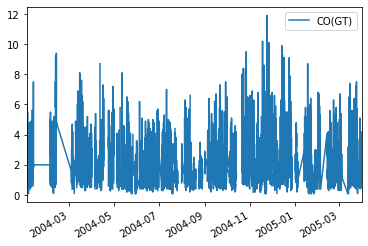

In [12]:
data.loc[:'2005-3'].plot(y='CO(GT)')

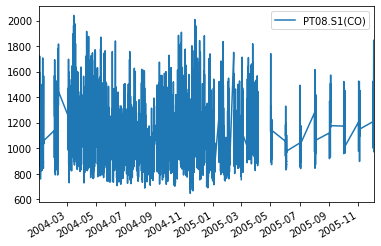

In [13]:
data.plot(y='PT08.S1(CO)')

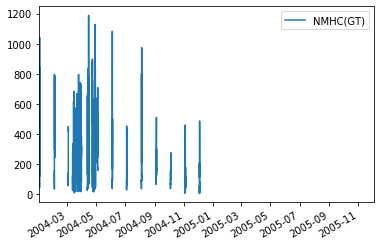

In [14]:
data.plot(y='NMHC(GT)')

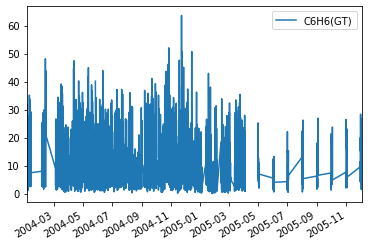

In [15]:
data.plot(y='C6H6(GT)')

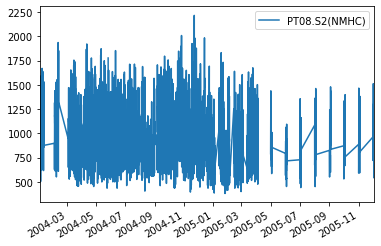

In [16]:
data.plot(y='PT08.S2(NMHC)')

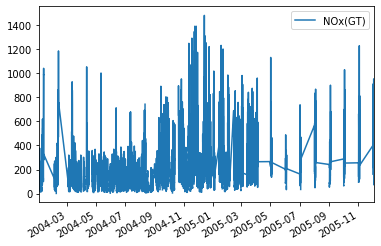

In [17]:
data.plot(y='NOx(GT)')

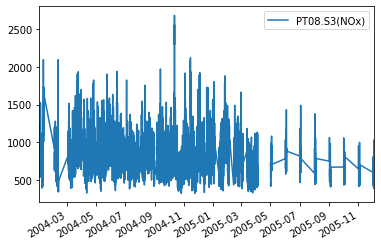

In [18]:
data.plot(y='PT08.S3(NOx)')

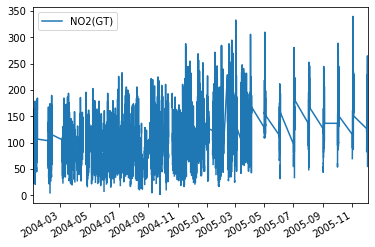

In [19]:
data.plot(y='NO2(GT)')

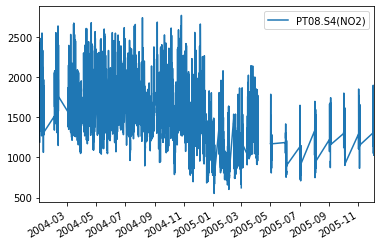

In [20]:
data.plot(y='PT08.S4(NO2)')

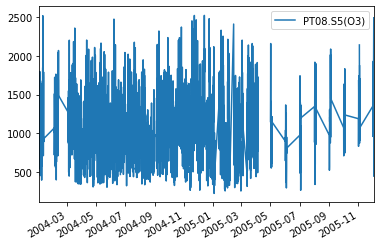

In [21]:
data.plot(y='PT08.S5(O3)')

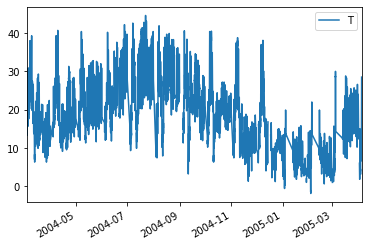

In [22]:
data.loc['2004-3':'2005-4'].plot(y='T')

In [23]:
data.index.max()

Timestamp('2005-12-03 23:00:00')

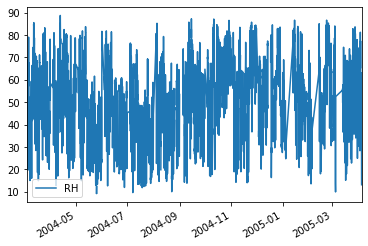

In [24]:
data.loc['2004-3':'2005-4'].plot(y='RH')

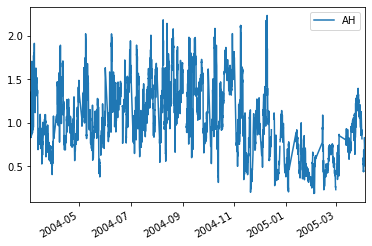

In [25]:
data.loc['2004-3':'2005-4'].plot(y='AH')

In [26]:
#dropping the indexes from 1st April 2005
#data.drop(index=data.loc['2005-4':].index.tolist(),inplace=True)
data=data.loc['2004-3':'2005-4']

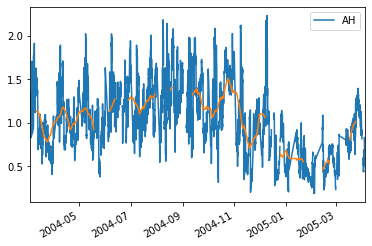

In [27]:
fig, ax = plt.subplots()
#finding trend using rolling window operation
dx=data['AH'].rolling(window=365, center=True, min_periods=360).mean()
data.plot(y='AH', ax=ax)
dx.plot(ax=ax)

In [28]:
data.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'ds'],
      dtype='object')

In [29]:

data['CO(GT)']=data['CO(GT)'].interpolate()
data['PT08.S1(CO)']=data['PT08.S1(CO)'].interpolate()
data['C6H6(GT)']=data['C6H6(GT)'].interpolate()
data['PT08.S2(NMHC)']=data['PT08.S2(NMHC)'].interpolate()
data['NOx(GT)']=data['NOx(GT)'].interpolate()
data['PT08.S3(NOx)']=data['PT08.S3(NOx)'].interpolate()
data['NO2(GT)']=data['NO2(GT)'].interpolate()
data['PT08.S4(NO2)']=data['PT08.S4(NO2)'].interpolate()
data['PT08.S5(O3)']=data['PT08.S5(O3)'].interpolate()
data['T']=data['T'].interpolate()
data['RH']=data['RH'].interpolate()
data['AH']=data['AH'].interpolate()


/Users/mg/Documents/projects/projects/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/mg/Documents/projects/projects/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/mg/Documents/projects/projects/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [30]:
data.isna().sum()/data.shape[0]

Date             0.000000
Time             0.000000
CO(GT)           0.000000
PT08.S1(CO)      0.000000
NMHC(GT)         0.896395
C6H6(GT)         0.000000
PT08.S2(NMHC)    0.000000
NOx(GT)          0.000000
PT08.S3(NOx)     0.000000
NO2(GT)          0.000000
PT08.S4(NO2)     0.000000
PT08.S5(O3)      0.000000
T                0.000000
RH               0.000000
AH               0.000000
ds               0.000000
dtype: float64

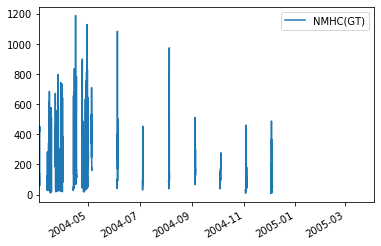

In [31]:
data.plot(y='NMHC(GT)')

In [32]:
data['NMHC(GT)']=data['NMHC(GT)'].interpolate()

/Users/mg/Documents/projects/projects/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


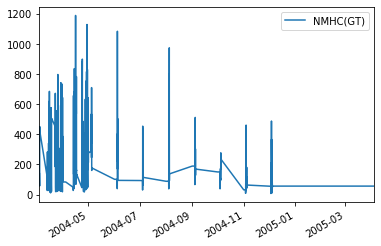

In [33]:
data.plot(y='NMHC(GT)')

In [34]:
data.isna().sum()/data.shape[0]*100

Date             0.0
Time             0.0
CO(GT)           0.0
PT08.S1(CO)      0.0
NMHC(GT)         0.0
C6H6(GT)         0.0
PT08.S2(NMHC)    0.0
NOx(GT)          0.0
PT08.S3(NOx)     0.0
NO2(GT)          0.0
PT08.S4(NO2)     0.0
PT08.S5(O3)      0.0
T                0.0
RH               0.0
AH               0.0
ds               0.0
dtype: float64

In [35]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,ds
2004-03-04 00:00:00,2004-03-04,00:00:00,1.6,1254.0,139.0,9.0,941.0,98.0,828.0,106.0,1566.0,1270.0,17.1,51.8,0.9990,2004-03-04 00:00:00
2004-03-04 01:00:00,2004-03-04,01:00:00,1.3,1141.0,98.0,6.3,827.0,73.0,936.0,88.0,1488.0,1110.0,16.2,54.2,0.9933,2004-03-04 01:00:00
2004-03-04 02:00:00,2004-03-04,02:00:00,1.2,1141.0,88.0,5.3,777.0,69.0,986.0,83.0,1455.0,1060.0,15.1,58.2,0.9886,2004-03-04 02:00:00
2004-03-04 03:00:00,2004-03-04,03:00:00,0.9,1042.0,66.0,3.8,697.0,64.5,1056.0,78.5,1410.0,965.0,15.1,57.6,0.9796,2004-03-04 03:00:00
2004-03-04 04:00:00,2004-03-04,04:00:00,0.8,986.0,57.0,3.0,651.0,60.0,1145.0,74.0,1380.0,891.0,14.5,58.0,0.9488,2004-03-04 04:00:00


In [36]:
data.to_pickle("AQI-processed-raw-data.pkl")

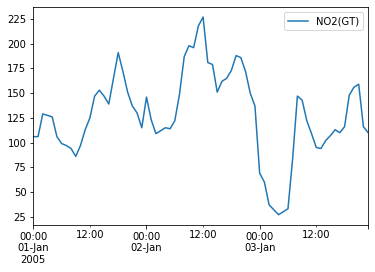

In [37]:
data.loc['2005-1-1':'2005-1-3'].plot(y='NO2(GT)')